![Alt Text](https://www.owen.org/wp-content/uploads/inequaltyscreencap.png)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Introduction </h1>

The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in an year on the basis of the feautures given. 


In [1]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import xml

# Reading the data file

In [2]:
#Read file after removing initial spaces
df = pd.read_csv('Data_inc.csv', skipinitialspace = True, encoding='latin-1')

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Profession Class**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **Final_census**: Continuous.
* **Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **Education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **Gender**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **Unnamed: 15**: float64.
* **income**: >50K,<=50K

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3   Education         32561 non-null  object 
 4   Education-num     32561 non-null  int64  
 5   marital-status    32561 non-null  object 
 6   occupation        32561 non-null  object 
 7   relationship      32561 non-null  object 
 8   race              32561 non-null  object 
 9   Gender            32561 non-null  object 
 10  capital-gain      32561 non-null  int64  
 11  capital-loss      32561 non-null  int64  
 12  hours-per-week    32561 non-null  int64  
 13  country           32561 non-null  object 
 14  income            32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [4]:
df.nunique()

Age                    73
Profession Class        9
Final_census        21648
Education              16
Education-num          16
marital-status          7
occupation             15
relationship            6
race                    5
Gender                  2
capital-gain          119
capital-loss           92
hours-per-week         94
country                42
income                  2
Unnamed: 15             1
dtype: int64

In [5]:
#Mapping binary values to the expected output
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [6]:
df.isnull().count()

Age                 32561
Profession Class    32561
Final_census        32561
Education           32561
Education-num       32561
marital-status      32561
occupation          32561
relationship        32561
race                32561
Gender              32561
capital-gain        32561
capital-loss        32561
hours-per-week      32561
country             32561
income              32561
Unnamed: 15         32561
dtype: int64

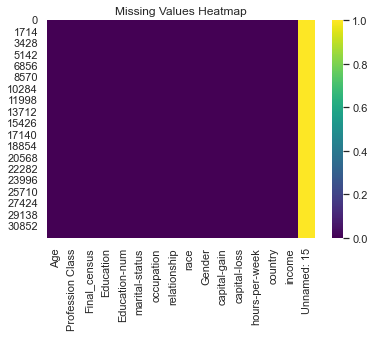

In [7]:
sns.heatmap(df.isnull(), cmap='viridis')

# Set plot properties
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,NaN


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The dataset contains absolutely **no null values**! 
* Age, Final Census, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Proffesion class, Education, Marital Status, Occupation, Relationship, Race, Gender, Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!
* Unnamed: 15 column has only 2 non null values so it should be removed from data.

In [9]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Unnamed: 15
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,2.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810,55000.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,55000.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,55000.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,55000.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,55000.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,55000.0


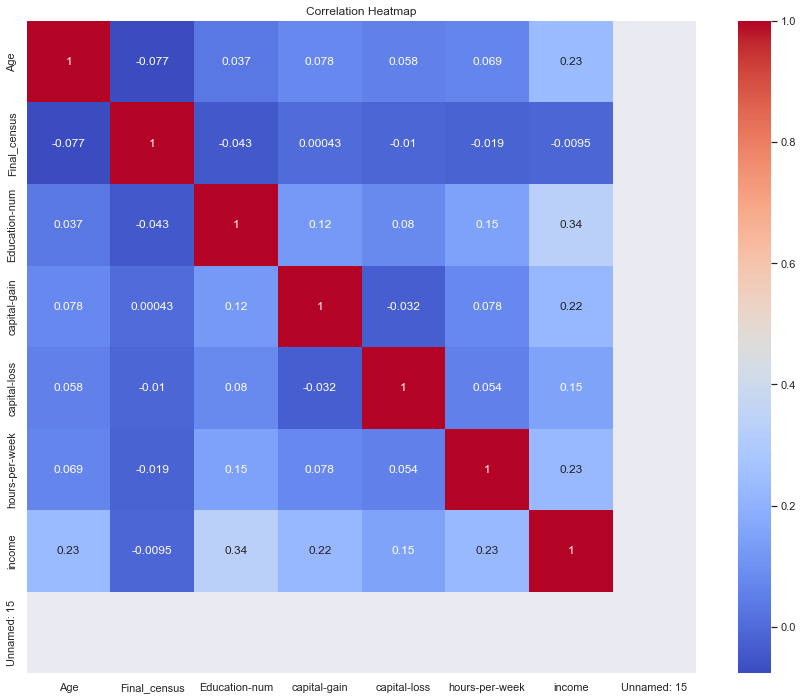

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.
* There is no correlation between variables so we can keep all variables.

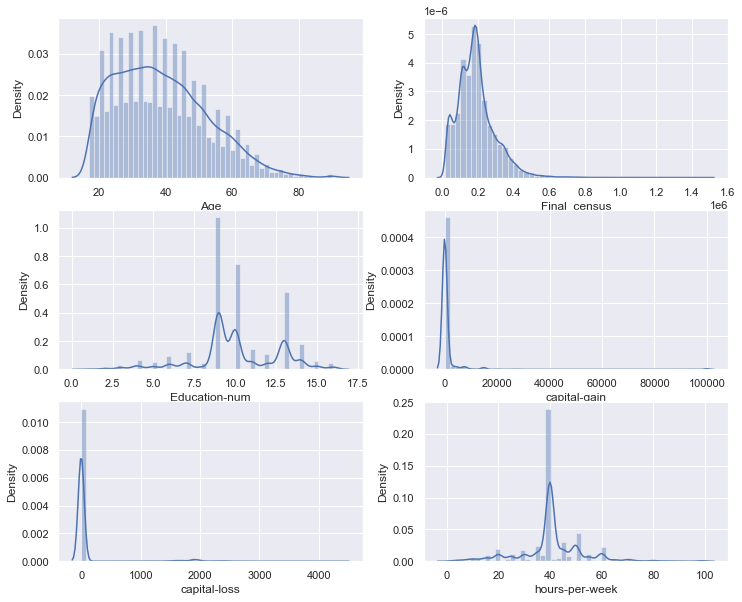

In [11]:
#dist_plot_col=['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss',	'hours-per-week']
dist_plot_col=['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss',	'hours-per-week']
plt.figure(figsize=(12,10))
plt.title('Distribution plots')
i = 1
for col in dist_plot_col:
    plt.subplot(3,2,i)
    sns.distplot(df[col])
    i+=1
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final_census'}>],
       [<AxesSubplot:title={'center':'Education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

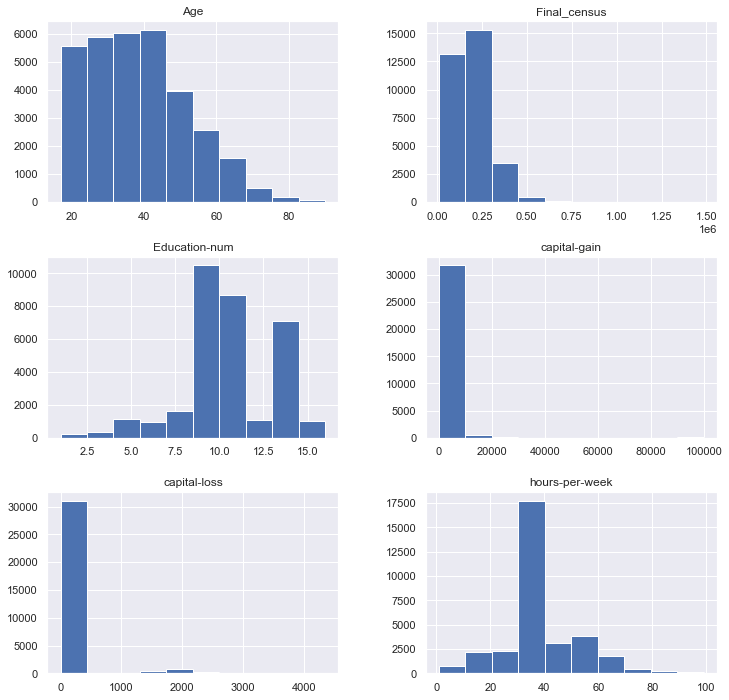

In [12]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

#### Visualization of Data

In [13]:
dataset=df.copy()

In [14]:
dataset.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,NaN


In [15]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

dataset['Age'] = pd.cut(dataset['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='income', ylabel='count'>

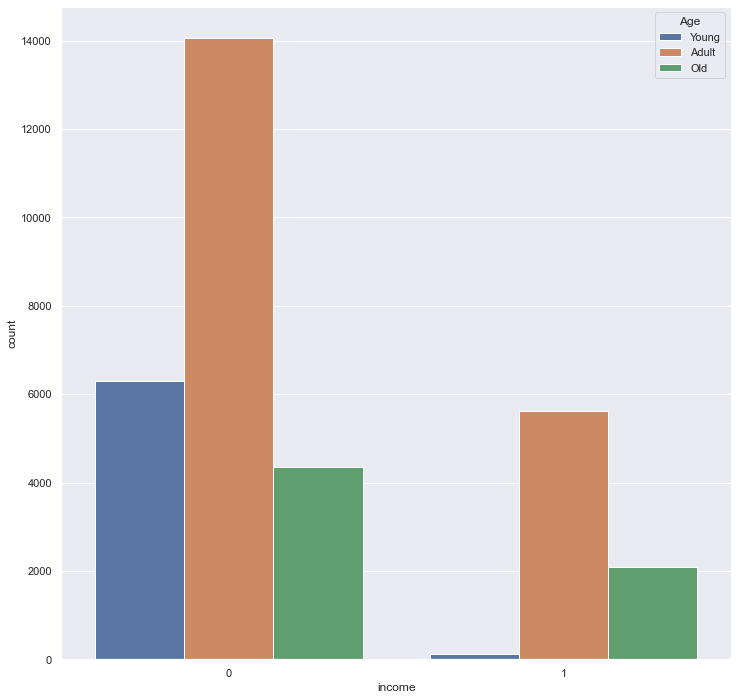

In [16]:
sns.countplot(x = 'income', hue = 'Age', data = dataset)

In [17]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income
dataset['Capital Diff'] = dataset['capital-gain'] - dataset['capital-loss']
dataset.drop(['capital-gain'], axis = 1, inplace = True)
dataset.drop(['capital-loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='income', ylabel='count'>

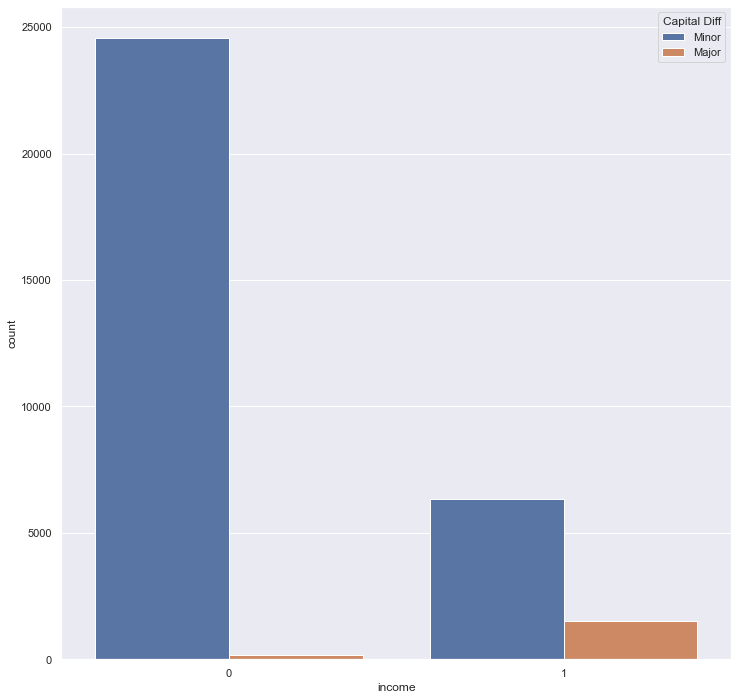

In [18]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = dataset)

In [19]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income
dataset['Hours per Week'] = pd.cut(dataset['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='income', ylabel='count'>

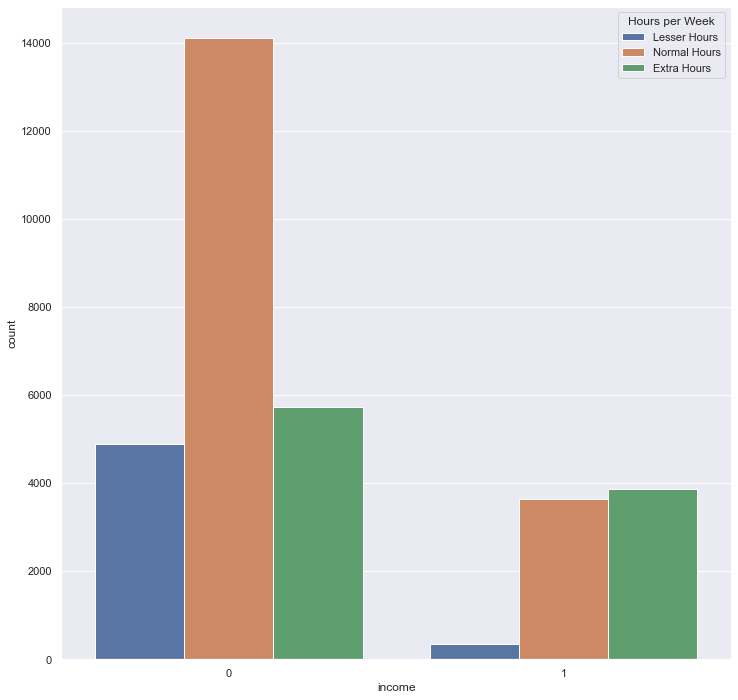

In [20]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

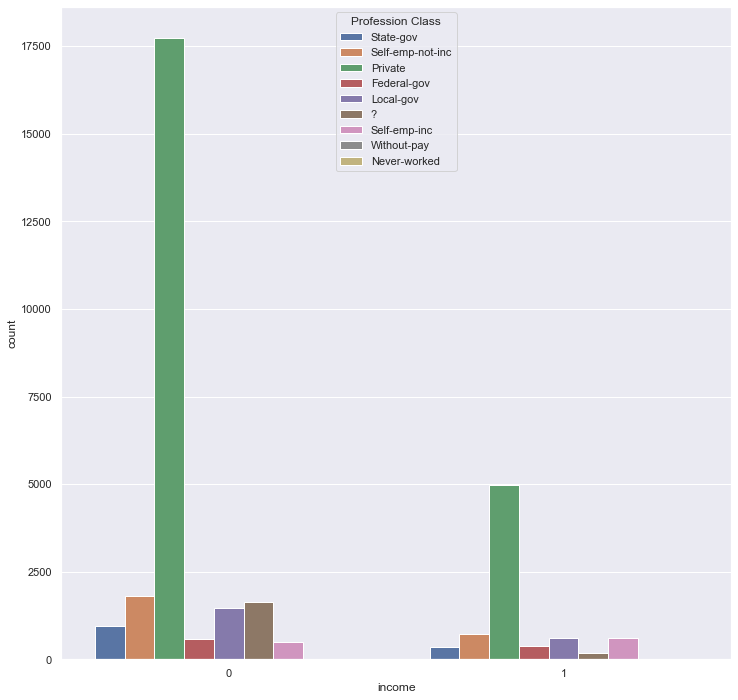

In [21]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'Profession Class', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

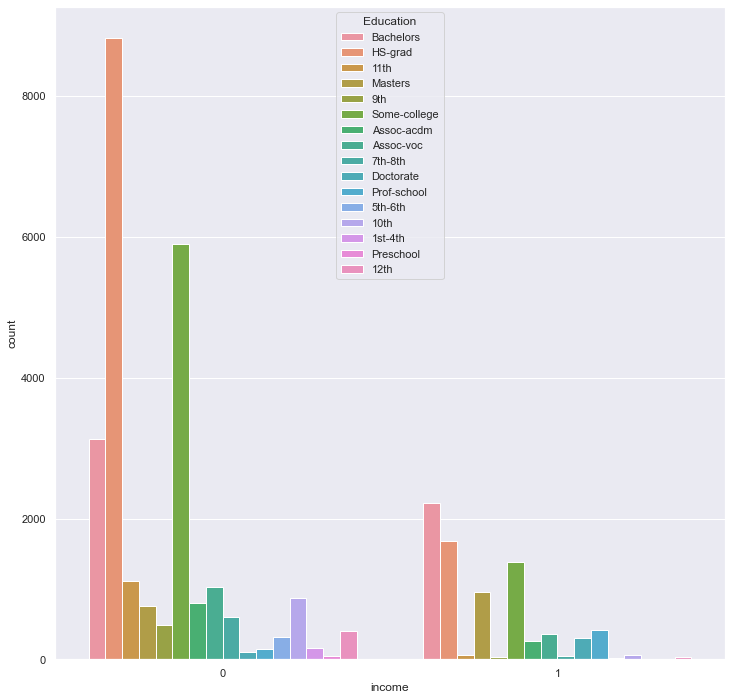

In [22]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'Education', data = dataset)

In [23]:
#Combining the lower grades of education together

df.drop(['Education-num'], axis = 1, inplace = True)
df['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: Education, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

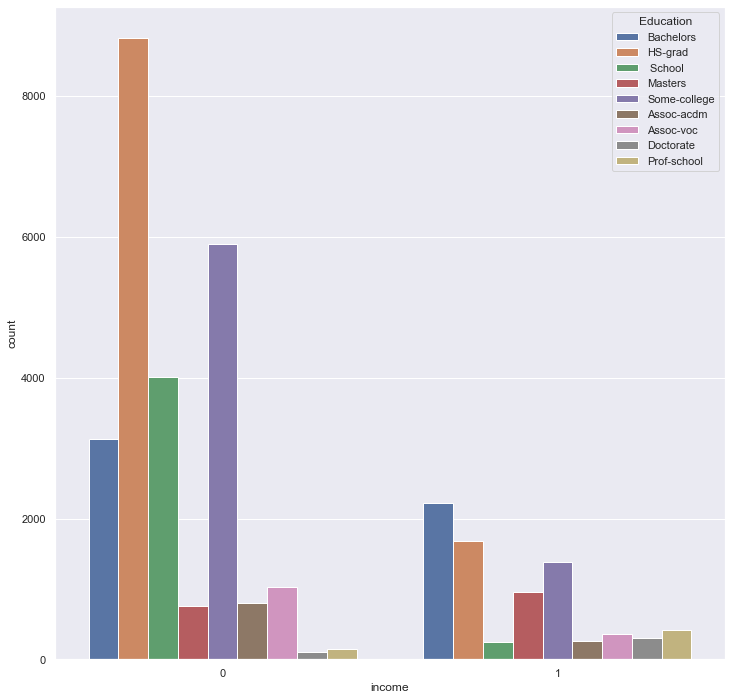

In [24]:
sns.countplot(x = 'income', hue = 'Education', data = df)

<AxesSubplot:xlabel='income', ylabel='count'>

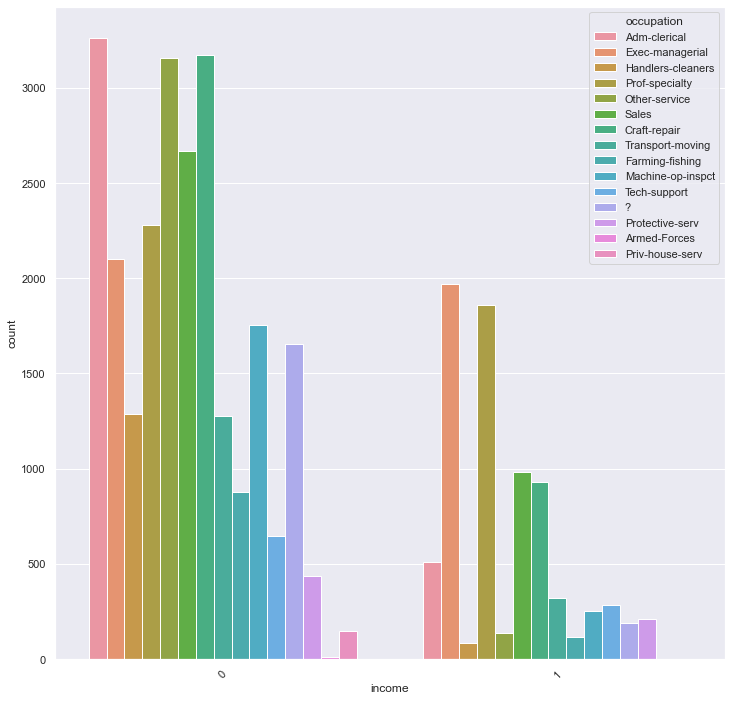

In [25]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

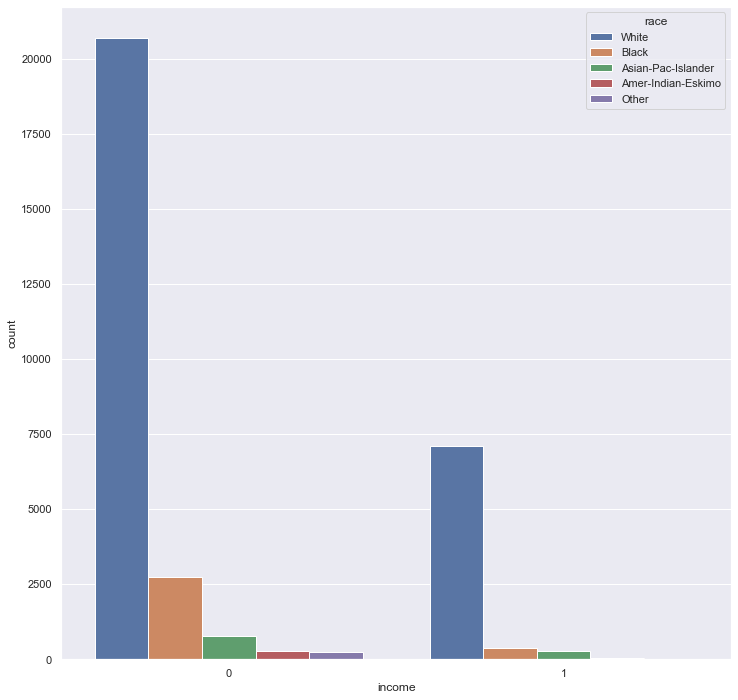

In [26]:
sns.countplot(x = 'income', hue = 'race', data = dataset)

In [27]:
#Since majority of race is white, the rest of races can be combined together to form a new group

df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

<AxesSubplot:xlabel='income', ylabel='count'>

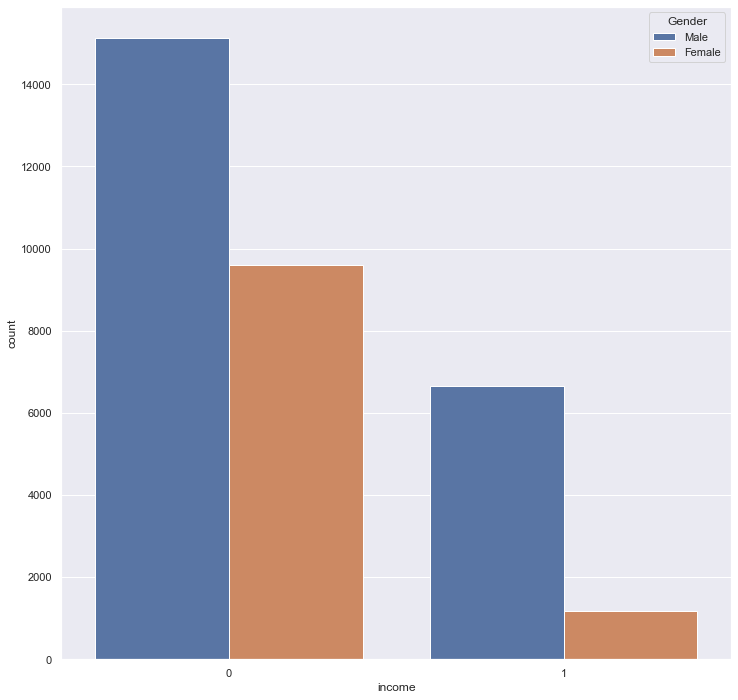

In [28]:
#Plot of sex corresponding to income

sns.countplot(x = 'income', hue = 'Gender', data = dataset)

# Exploratory Data Analysis

In [29]:
df['Profession Class'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [30]:
#As there are '?' in dataset so replace them with NAN
df[df == '?'] = np.nan

In [31]:
#Removing 'Unnamed: 15' column as it has only 2 non null entries so it cannot contribute
df.drop(['Unnamed: 15'], axis=1, inplace=True)

In [32]:
# #Removing 1st space from some column name
# df.rename(columns={' Education': 'Education', ' Education-num': 'Education-num', 
#                    ' marital-status': 'marital-status', ' occupation': 'occupation',
#                    ' relationship': 'relationship', ' race': 'race', ' capital-gain': 'capital-gain',
#                    ' capital-loss': 'capital-loss', ' hours-per-week': 'hours-per-week',
#                    ' country': 'country', ' income': 'income'}, inplace=True)

In [33]:
#Filling nan values with mode as all columns which are nan are of object datatype
for i in ['Profession Class', 'occupation', 'country']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [34]:
#Check all the changes done in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   marital-status    32561 non-null  object
 5   occupation        32561 non-null  object
 6   relationship      32561 non-null  object
 7   race              32561 non-null  object
 8   Gender            32561 non-null  object
 9   capital-gain      32561 non-null  int64 
 10  capital-loss      32561 non-null  int64 
 11  hours-per-week    32561 non-null  int64 
 12  country           32561 non-null  object
 13  income            32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [35]:
#Removing one record with country as Holand-Netherlands
df = df[df.country!='Holand-Netherlands']

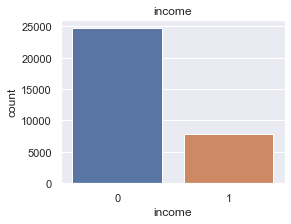

In [36]:
plt.figure(figsize=(4,3))
sns.countplot(x=df['income'])
plt.title('income')
plt.show()

In [37]:
df.income.value_counts()

0    24719
1     7841
Name: income, dtype: int64

In [38]:
X = df.drop(['income'], axis=1)
y = df['income']

###### Split the columns into train and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [40]:
print(X_train.dtypes)

Age                  int64
Profession Class    object
Final_census         int64
Education           object
marital-status      object
occupation          object
relationship        object
race                object
Gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
country             object
dtype: object


# Feature Engineering

###### Over Sampling

In [41]:
from imblearn.over_sampling import RandomOverSampler
print("Shape before oversampling")
print(X_train.shape)
print(y_train.shape)
os = RandomOverSampler()
X_train,y_train = os.fit_resample(X_train,y_train)
print("Shape after oversampling")
print(X_train.shape)
print(y_train.shape)

Shape before oversampling
(22792, 13)
(22792,)
Shape after oversampling
(34546, 13)
(34546,)


###### Encoding Categorical variables

In [42]:
from sklearn import preprocessing

In [43]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [44]:
df.country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary'],
      dtype=object)

###### Encoding the categorical columns

In [45]:
cat_col = ['Profession Class', 'Education',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country']
for col in cat_col:
    l = preprocessing.LabelEncoder()
    X_train[col] = l.fit_transform(X_train[col])
    X_test[col] = l.transform(X_test[col])

###### Scaling the values so that higher ones will not dominate

In [46]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = pd.DataFrame(s.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(s.transform(X_test), columns = X.columns)

X_test.head()

# Model Building

###### Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print(f"<Classification Report Logistic regression with Standardization> \n{classification_report(y_test, y_pred_log, target_names=['<=50K', '>50K'], digits=4)}")

<Classification Report Logistic regression with Standardization> 
              precision    recall  f1-score   support

       <=50K     0.9024    0.7240    0.8034      7446
        >50K     0.4584    0.7489    0.5687      2322

    accuracy                         0.7299      9768
   macro avg     0.6804    0.7365    0.6861      9768
weighted avg     0.7969    0.7299    0.7476      9768



###### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# training a knn model
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(f"<Classification Report Logistic regression with Standardization> \n{classification_report(y_test, knn_pred, target_names=['<=50K', '>50K'], digits=4)}")

<Classification Report Logistic regression with Standardization> 
              precision    recall  f1-score   support

       <=50K     0.9124    0.7865    0.8448      7446
        >50K     0.5254    0.7580    0.6206      2322

    accuracy                         0.7797      9768
   macro avg     0.7189    0.7722    0.7327      9768
weighted avg     0.8204    0.7797    0.7915      9768



###### SVM Classifier

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)
print(f"<Classification Report Logistic regression with Standardization> \n{classification_report(y_test, svc_pred, target_names=['<=50K', '>50K'], digits=4)}")

<Classification Report Logistic regression with Standardization> 
              precision    recall  f1-score   support

       <=50K     0.9452    0.7507    0.8368      7446
        >50K     0.5184    0.8605    0.6470      2322

    accuracy                         0.7768      9768
   macro avg     0.7318    0.8056    0.7419      9768
weighted avg     0.8438    0.7768    0.7917      9768



###### Decision tree with Grid CV

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
# Define the parameter grid to search over
param_grid_std = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,3, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [5, 10, 20, 50, 100]}

# Create the GridSearchCV object
grid_search_std = GridSearchCV(DecisionTreeClassifier(random_state=123),
                           param_grid_std, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_std.fit(X_train, y_train)

# Instantiate the decision tree model with the best parameters
dtree_std = DecisionTreeClassifier(criterion=grid_search_std.best_params_['criterion'],
                               max_depth=grid_search_std.best_params_['max_depth'],
                               min_samples_split=grid_search_std.best_params_['min_samples_split'],
                               min_samples_leaf=grid_search_std.best_params_['min_samples_leaf'],
                               random_state=123)

In [51]:
# Fit the model to the training data
dtree_std.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_dtree = dtree_std.predict(X_test)

print(f"<Classification Report Decision Tree with Standardization> \n{classification_report(y_test, y_pred_dtree, target_names=['<=50K', '>50K'], digits=4)}")

<Classification Report Decision Tree with Standardization> 
              precision    recall  f1-score   support

       <=50K     0.9136    0.8261    0.8676      7446
        >50K     0.5733    0.7494    0.6496      2322

    accuracy                         0.8078      9768
   macro avg     0.7434    0.7877    0.7586      9768
weighted avg     0.8327    0.8078    0.8158      9768



###### Random forest with Grid CV

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid to search over
param_grid_std = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,3, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [5, 10, 20, 50, 100]}

# Create the GridSearchCV object
grid_search_std = GridSearchCV(RandomForestClassifier(random_state=123),
                           param_grid_std, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_std.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [53]:
r_model = RandomForestClassifier(criterion=grid_search_std.best_params_['criterion'],
                               max_depth=grid_search_std.best_params_['max_depth'],
                               min_samples_split=grid_search_std.best_params_['min_samples_split'],
                               min_samples_leaf=grid_search_std.best_params_['min_samples_leaf'],
                               random_state=123)
r_model.fit(X_train, y_train)
y_pred_rf = r_model.predict(X_test)
print(f"<Classification Report Rendom forest with Standardization> \n{classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K'], digits=4)}")

<Classification Report Rendom forest with Standardization> 
              precision    recall  f1-score   support

       <=50K     0.9389    0.8274    0.8796      7446
        >50K     0.5992    0.8273    0.6950      2322

    accuracy                         0.8274      9768
   macro avg     0.7690    0.8274    0.7873      9768
weighted avg     0.8581    0.8274    0.8358      9768



###### Feature importance

In [54]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(r_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
relationship,0.178
Age,0.154
marital-status,0.133
capital-gain,0.129
Education,0.093
hours-per-week,0.084
Final_census,0.071
occupation,0.062
capital-loss,0.038


<AxesSubplot:xlabel='feature'>

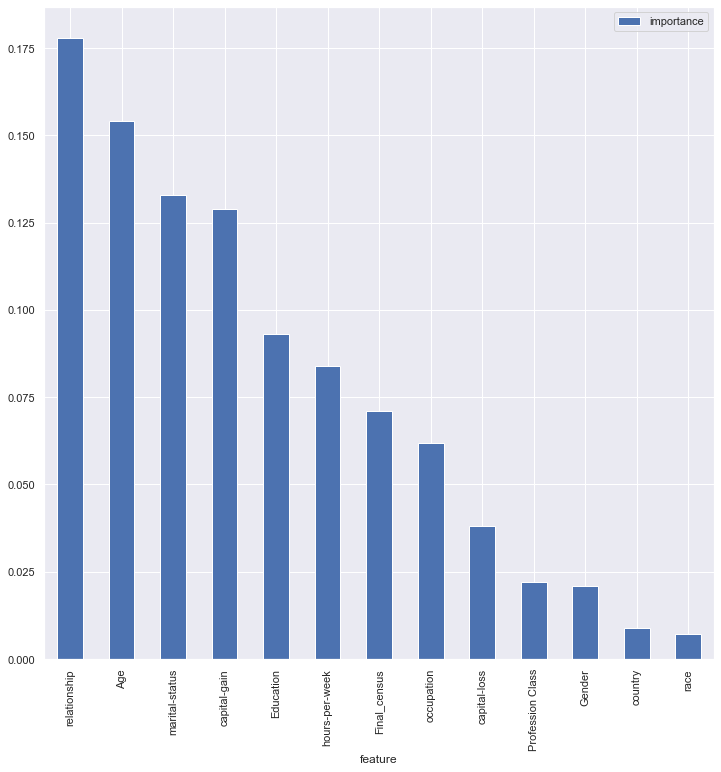

In [55]:
importances.plot.bar()

AUC: 0.9160178956011275


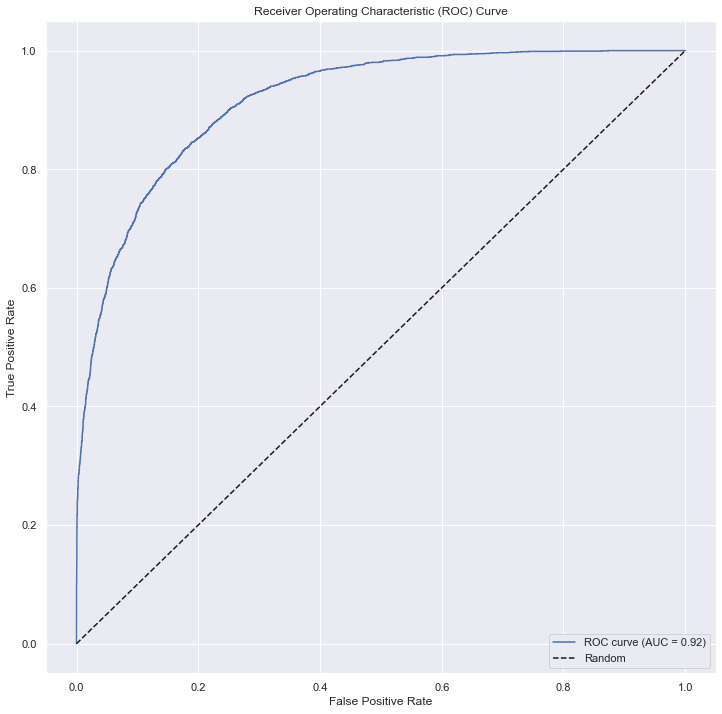

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score



y_pred_prob = r_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  


auc = roc_auc_score(y_test, y_pred_prob)  
print("AUC:", auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

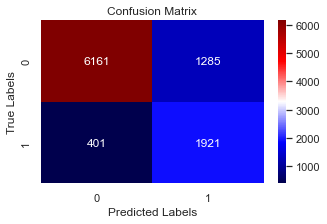

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 3))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="d", cmap="seismic")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()